In [11]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

LABELS = {0: "Upper part", 1: "Bottom part", 2: "One piece", 3: "Footwear", 4: "Bags"}

# Load data

In [3]:
def load_data():
    """
    Load data from pickle file
    """
    with open('../data/processed/fashion_mnist_k5.pkl', 'rb') as f:
        (train_x, train_y), (test_x, test_y) = pickle.load(f)
        return train_x, train_y, test_x, test_y

train_x, train_y, test_x, test_y = load_data()

# Count samples

In [19]:
train_labels = np.argmax(train_y, axis=1)
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4]), array([24000,  6000,  6000, 18000,  6000]))

After merging the classes, this dataset present some class imbalance. We have one class with 4 times more samples than other three classes. 

We should duplicate the samples of the smaller classes to balance the dataset or use weights between classes when training the model.

# Plot examples

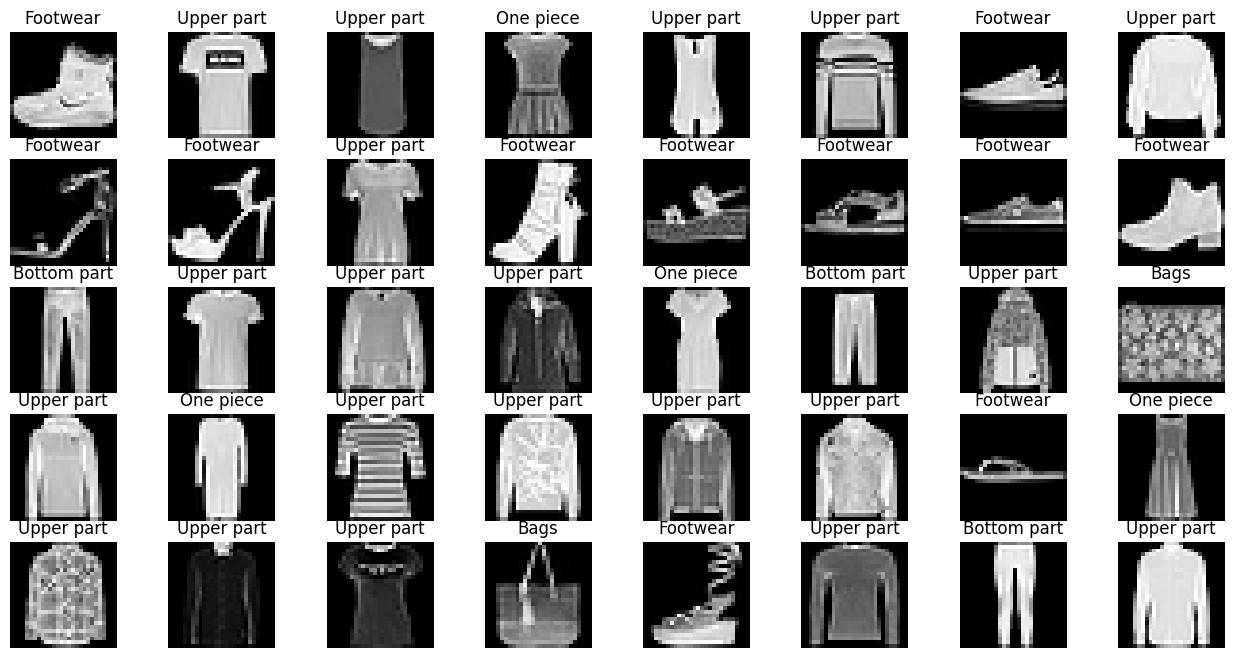

In [13]:
f, ax = plt.subplots(5,8, figsize=(16,8))

for i, image in enumerate(train_x[:40]):
    ax[i//8, i%8].imshow(image, cmap='gray')
    ax[i//8, i%8].axis('off')
    ax[i//8, i%8].set_title(LABELS[np.argmax(train_y[i])])

plt.show()

# 

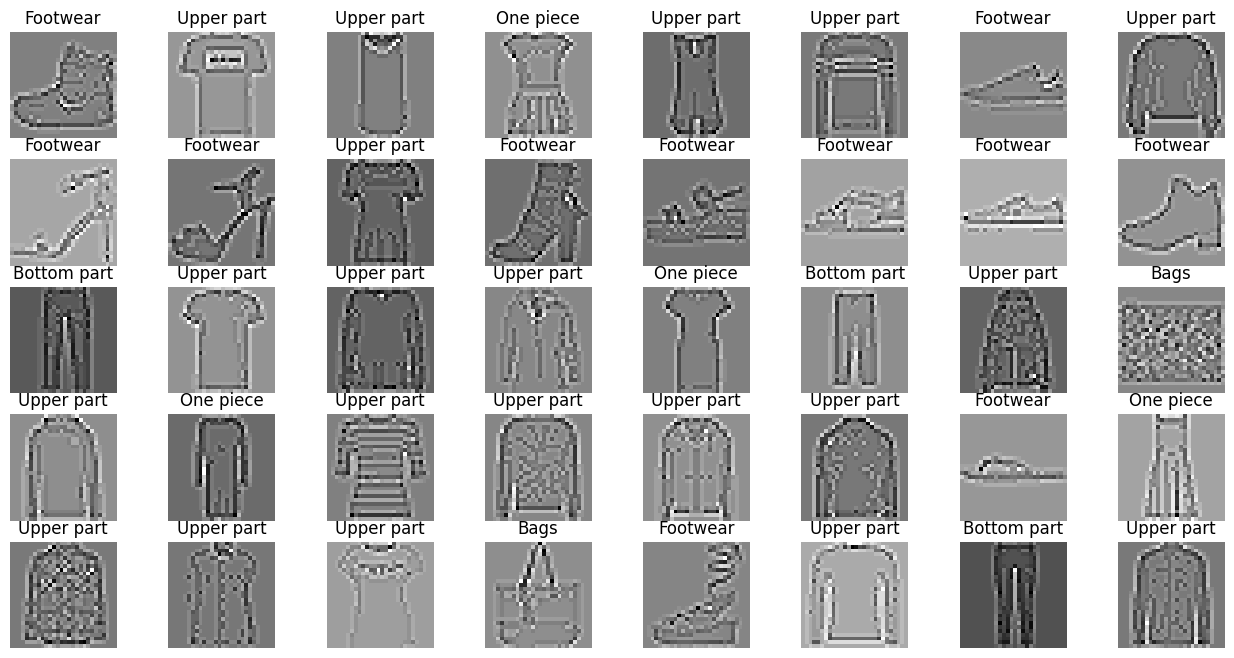

In [65]:
from scipy import ndimage
f, ax = plt.subplots(5,8, figsize=(16,8))

for i, image in enumerate(train_x[:40]):
    image = np.round(image / 50) * 50
    laplacian = ndimage.laplace(image)
    # Normalize between 0 and 255
    laplacian = (laplacian - laplacian.min()) / (laplacian.max() - laplacian.min()) * 255
    ax[i//8, i%8].imshow(laplacian, cmap='gray')
    ax[i//8, i%8].axis('off')
    ax[i//8, i%8].set_title(LABELS[np.argmax(train_y[i])])

plt.show()